<a href="https://colab.research.google.com/github/shicoded/Mobile_price_perdiction/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/dataset_folder/mobile data/mobile phone price prediction.csv')

# Display the first few rows of the dataframe to understand its structure
data.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [47]:
# Convert the 'Price' column to a numerical type if needed
# If 'Price' column contains commas, uncomment the following line
data['Price'] = data['Price'].str.replace(',', '').astype(float)

In [48]:
data.drop(columns=['Unnamed: 0','Name'],inplace=True) # Drop columns that are not needed for the analysis
# Fill missing values with the mode of each column
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder # Label encode categorical variables

le = LabelEncoder()
categorical_columns = ['Camera', 'Processor_name', 'Screen_resolution', 'Display', 'Battery', 'External_Memory']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [50]:
# Remove duplicate rows if any
data.drop_duplicates(inplace=True)
# Create dummy variables for categorical features
dummie_df = pd.get_dummies(data, drop_first=True)

In [51]:
# Identify features with a correlation greater than 0.15 with the target variable
corr_threshold = 0.15
corr_matrix = dummie_df.corr()
high_corr_features = corr_matrix.index[abs(corr_matrix["Price"]) > corr_threshold].tolist()
# Drop features with low correlation
dummie_df = dummie_df[high_corr_features]

In [52]:
# Split the dataset into training and testing sets
X = dummie_df.drop(columns='Price')
y = dummie_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [54]:
# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [55]:
# Predict with both models
y1_pred = linear_model.predict(X_test)
y2_pred = tree_model.predict(X_test)


In [56]:
# Calculate performance metrics
rmse_1 = mean_squared_error(y_test, y1_pred, squared=False)
r2_1 = r2_score(y_test, y1_pred)
rmse_2 = mean_squared_error(y_test, y2_pred, squared=False)
r2_2 = r2_score(y_test, y2_pred)

In [57]:
# Print performance metrics
print(f'Linear Regression RMSE: {rmse_1}')
print(f'Linear Regression R-Squared: {r2_1}')
print(f'Decision Tree RMSE: {rmse_2}')
print(f'Decision Tree R-Squared: {r2_2}')

Linear Regression RMSE: 15713.711345585629
Linear Regression R-Squared: 0.7344592144248598
Decision Tree RMSE: 17022.368623003345
Decision Tree R-Squared: 0.6883883574068028


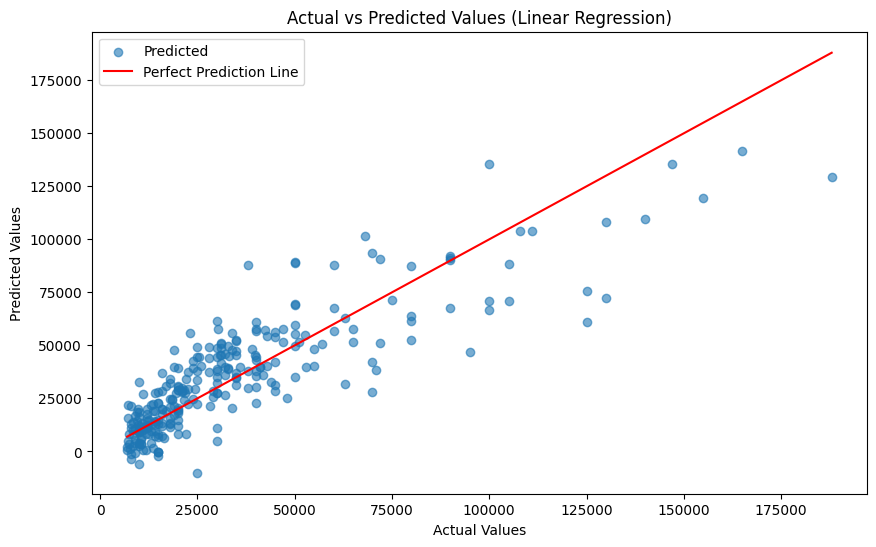

In [58]:
# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y1_pred, label='Predicted', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.legend()
plt.show()


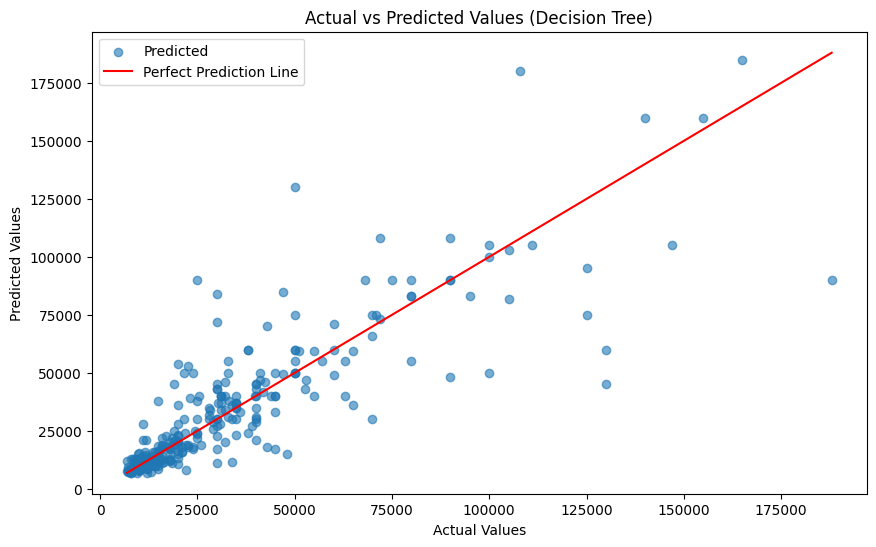

In [59]:
# Plot actual vs predicted values for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y2_pred, label='Predicted', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.legend()
plt.show()

In [60]:
# Conclusion
if rmse_1 < rmse_2:
    print("Linear Regression has a lower RMSE and is better for this dataset.")
else:
    print("Decision Tree has a lower RMSE and is better for this dataset.")

Linear Regression has a lower RMSE and is better for this dataset.
